#Introdução


Nesse trabalho, buscarei encontrar o melhor algoritmo para estimar o valor médio das casas de Boston ocupadas pelos proprietários a partir de outros atributos.

Aqui já inicializamos o código:

In [ ]:
import numpy as np
seed = 31 #Dia do meu nascimento. Fixa a aleatoriedade dos experimentos para que sejam reproduzíveis

#Dados do problema

Primeiro, vamos obter os dados do problema:


In [ ]:
import pandas as pd

boston_housing = pd.read_csv("Boston.csv", usecols=range(14))

Vamos visualizar as primeiras linhas dos dados:

In [ ]:
boston_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,538.0,6575.0,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,469.0,6421.0,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,469.0,7185.0,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,458.0,6998.0,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,458.0,7147.0,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Agora vamos visualizar 10 linhas aleatórias dos nossos dados:

In [ ]:
print(boston_housing.shape)
boston_housing.sample(n = 10)

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
463,5.82115,0.0,18.10,0,713.00,6513.00,89.9,2.8016,24,666,20.2,393.82,10.29,20.2
472,3.56868,0.0,18.10,0,0.58,6437.00,75.0,2.8965,24,666,20.2,393.37,14.36,23.2
162,1.83377,0.0,19.58,1,605.00,7802.00,98.2,2.0407,5,403,14.7,389.61,1.92,50.0
269,0.09065,20.0,6.96,1,464.00,5.92,61.5,3.9175,3,223,18.6,391.34,13.65,20.7
7,0.14455,12.5,7.87,0,524.00,6172.00,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
95,0.12204,0.0,2.89,0,445.00,6625.00,57.8,3.4952,2,276,18.0,357.98,6.65,28.4
244,0.20608,22.0,5.86,0,431.00,5593.00,76.5,7.9549,7,330,19.1,372.49,12.50,17.6
381,15.87440,0.0,18.10,0,671.00,6545.00,99.1,1.5192,24,666,20.2,396.90,21.08,10.9
489,0.18337,0.0,27.74,0,609.00,5414.00,98.3,1.7554,4,711,20.1,344.05,23.97,7.0
138,0.24980,0.0,21.89,0,624.00,5857.00,98.2,1.6686,4,437,21.2,392.04,21.32,13.3


Vamos observar algumas informações do dataframe:

In [ ]:
boston_housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


O site http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html da uma descrição do que cada sigla significa:


There are 14 attributes in each case of the dataset. They are:

**CRIM **- per capita crime rate by town

**ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.

**INDUS** - proportion of non-retail business acres per town.

**CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

**NOX** - nitric oxides concentration (parts per 10 million)

**RM** - average number of rooms per dwelling

**AGE** - proportion of owner-occupied units built prior to 1940

**DIS** - weighted distances to five Boston employment centres

**RAD** - index of accessibility to radial highways

**TAX** - full-value property-tax rate per $10,000

**PTRATIO** - pupil-teacher ratio by town

**B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

**LSTAT** - % lower status of the population

**MEDV** - Median value of owner-occupied homes in $1000's



Como todas as características são numéricas, não precisamos fazer uma conversão de dados qualitativos em quantitativos.



#Análise exploratória

Vamos obter alguns dados estatísticos a cerca dos dados que serão tratados:

In [ ]:
boston_housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,97.971640,11.363636,11.136779,0.069170,465.069952,5642.688043,68.574901,381.361762,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,1174.241324,23.322453,6.860353,0.253994,222.311286,1999.032788,28.148861,1270.503546,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.400000,4.880000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,429.000000,5757.500000,45.025000,2.122250,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,504.000000,6133.000000,77.500000,3.513850,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.695990,12.500000,18.100000,0.000000,605.000000,6545.750000,94.075000,6.077125,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,18811.000000,100.000000,27.740000,1.000000,871.000000,8725.000000,100.000000,8344.000000,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Também podemos visualizar os dados através de histogramas:

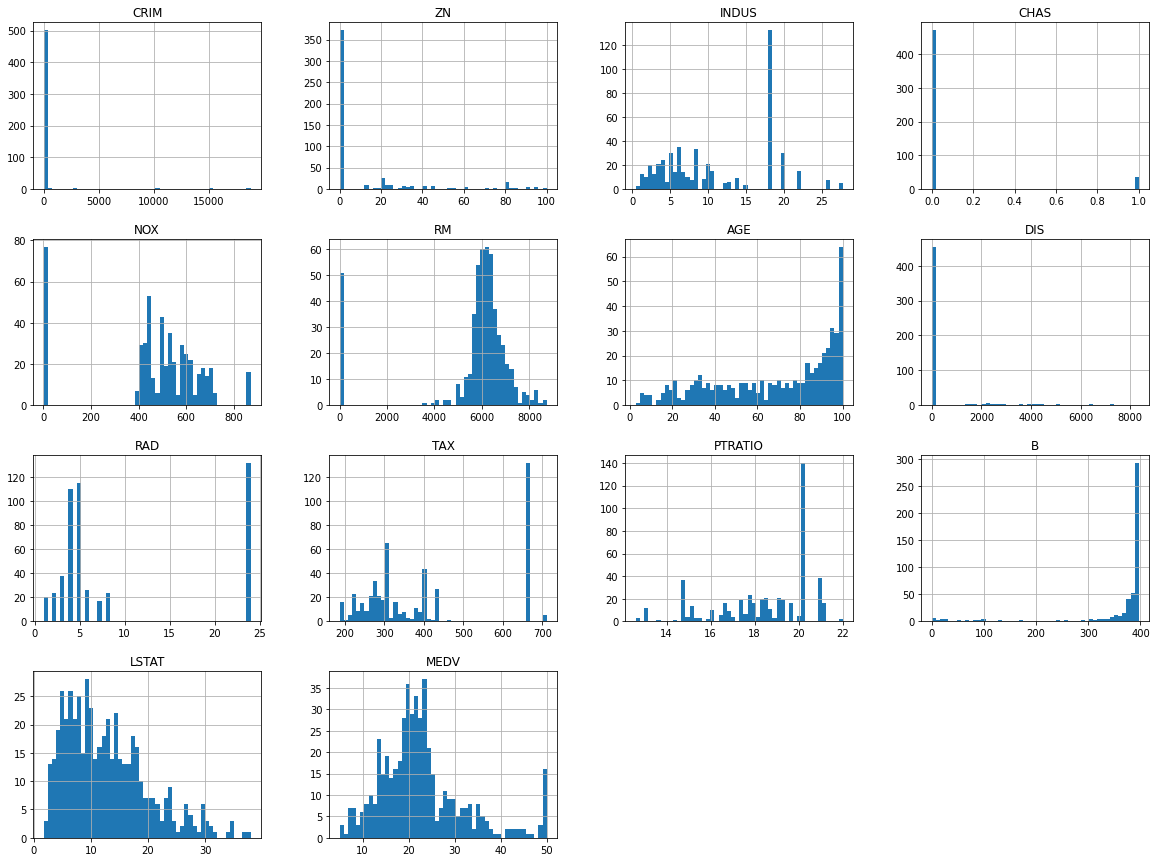

In [ ]:
import matplotlib.pyplot as plt
boston_housing.hist(bins=50, figsize=(20,15))
plt.show()

#Separação dos dados em conjunto de treino e teste

Vamos estratificar os dados a partir da característica MEDV. Essa abordagem diminui o risco de que o conjunto de treino saía enviesado em comparação com a abordagem da simples separação aleatória. Resolvi, de maneira um tanto arbitrária, escolher 5 categorias. Um estudo mais aprofundado da natureza do problema junto com uma análise estatística nos daria o número adequado de categorias


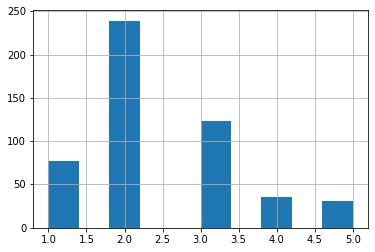

In [ ]:
boston_housing["MEDV_CATEGORY"] = pd.cut(boston_housing["MEDV"], 
                                         bins=[4.99, 14, 23, 32, 41, np.inf],
                                         labels=[1, 2, 3, 4, 5])
boston_housing["MEDV_CATEGORY"].value_counts()
boston_housing["MEDV_CATEGORY"].hist()

Agora vamos separar os nossos dados em teste/treino utilizando as categorias:


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=seed)

for train_i, test_i in split.split(boston_housing, boston_housing["MEDV_CATEGORY"]):
    strat_train_set = boston_housing.loc[train_i]
    strat_test_set = boston_housing.loc[test_i]

Vamos ver se as proporções foram mentidas na estratificação de teste:

In [ ]:
strat_test_set["MEDV_CATEGORY"].value_counts() / len(strat_test_set)

2    0.470588
3    0.245098
1    0.156863
4    0.068627
5    0.058824
Name: MEDV_CATEGORY, dtype: float64

In [ ]:

boston_housing["MEDV_CATEGORY"].value_counts() / len(boston_housing)

2    0.472332
3    0.243083
1    0.152174
4    0.071146
5    0.061265
Name: MEDV_CATEGORY, dtype: float64

Foram mantidas. Vamos remover a coluna "MEDV_CATEGORY" dos conjuntos testes/treino estratificados:

In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("MEDV_CATEGORY", axis=1, inplace=True)

 Para evitar um problema de Snooping Bias, trabalharemos sem os dados de teste. Deste modo, não estaremos enviesando nosso modelo com dados fora do grupo de treino.

In [ ]:
boston_housing = strat_train_set.copy()

#Correlações

Vamos visualizar melhor as correlações presentes nos nossos dados. Vamos obter a matriz de correlações:

In [ ]:
corr_matrix = boston_housing.corr()
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.043973,0.091565,-0.025526,0.064677,0.001549,0.087602,-0.029068,0.138293,0.130049,0.056815,-0.130261,0.164769,-0.062377
ZN,-0.043973,1.000000,-0.535204,-0.056145,-0.199227,0.049612,-0.591852,0.070443,-0.308803,-0.297583,-0.359189,0.169627,-0.416428,0.329617
INDUS,0.091565,-0.535204,1.000000,0.051176,0.285574,-0.050867,0.638676,-0.113686,0.587486,0.702531,0.366717,-0.348580,0.574521,-0.466824
CHAS,-0.025526,-0.056145,0.051176,1.000000,-0.040046,-0.016508,0.068096,0.047941,-0.044099,-0.076373,-0.139773,0.051172,-0.045242,0.136133
NOX,0.064677,-0.199227,0.285574,-0.040046,1.000000,-0.018737,0.245470,0.009285,0.038352,0.074648,-0.014227,-0.191198,0.139616,-0.096679
RM,0.001549,0.049612,-0.050867,-0.016508,-0.018737,1.000000,-0.017177,0.024545,0.010637,-0.010996,-0.086394,-0.013818,-0.138456,0.177695
AGE,0.087602,-0.591852,0.638676,0.068096,0.245470,-0.017177,1.000000,-0.014517,0.438439,0.474639,0.256657,-0.246945,0.588293,-0.370277
DIS,-0.029068,0.070443,-0.113686,0.047941,0.009285,0.024545,-0.014517,1.000000,-0.101474,-0.127465,-0.026515,0.072580,-0.038791,0.035922
RAD,0.138293,-0.308803,0.587486,-0.044099,0.038352,0.010637,0.438439,-0.101474,1.000000,0.914844,0.450710,-0.454903,0.481177,-0.391831
TAX,0.130049,-0.297583,0.702531,-0.076373,0.074648,-0.010996,0.474639,-0.127465,0.914844,1.000000,0.449157,-0.445981,0.522296,-0.466507


Vamos observar quais dados tem maior correlação com MEDV:

In [ ]:
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
ZN         0.329617
B          0.327350
RM         0.177695
CHAS       0.136133
DIS        0.035922
CRIM      -0.062377
NOX       -0.096679
AGE       -0.370277
RAD       -0.391831
TAX       -0.466507
INDUS     -0.466824
PTRATIO   -0.539146
LSTAT     -0.730608
Name: MEDV, dtype: float64

Note que as correlações negativas também são importantes. O que parece ter uma maior correlação com MEDV é LSTAT. Vamos plotar esses dados um em relação ao outro: 

(0.0, 35.0, 0.0, 55.0)

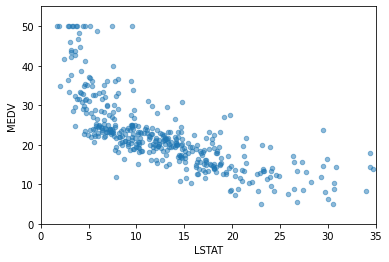

In [ ]:
boston_housing.plot(kind="scatter", x="LSTAT", y="MEDV",
             alpha=0.5)
plt.axis([0, 35, 0, 55])

Podemos observar que, quando maior o índice LSTAT, menor o índice MEDV, uma correlação bem marcada.


#Preparação dos dados

Vamos agora preparar os dados para utilizar no Machine Learning. Primeiro, separamos a característica "MEDV" dos dados:

In [ ]:
boston_housing = strat_train_set.drop("MEDV", axis=1) 
boston_housing_labels = strat_train_set["MEDV"].copy()

Verifica-se se existem dados faltantes:

In [ ]:
incomplete_rows = boston_housing[boston_housing.isnull().any(axis=1)].head() 
incomplete_rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT


Não existe. Criaremos um pipeline para pré-processar os dados.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler  

pipeline = Pipeline([('std_scaler', StandardScaler()),]) #Aqui reescalamos as variáveis

boston_housing_prepared = pipeline.fit_transform(boston_housing)

In [ ]:
print(boston_housing_prepared.shape)
boston_housing_prepared

(404, 13)


array([[-0.09270062, -0.47409584, -0.39782071, ...,  1.10881235,
         0.4177602 , -0.46552146],
       [ 7.70814052, -0.47409584,  0.99420867, ...,  0.78234475,
         0.25249633,  0.74179456],
       [-0.09277091, -0.47409584,  0.22523646, ...,  0.08277131,
         0.3260201 , -0.05607166],
       ...,
       [-0.08467848, -0.47409584,  0.99420867, ...,  0.78234475,
        -3.44168879,  1.57611863],
       [-0.09261445, -0.47409584, -0.20229457, ..., -0.05714337,
         0.43465969, -0.14300963],
       [-0.09262041, -0.47409584, -0.63858051, ..., -0.29033452,
         0.44124391,  2.53383853]])

#Comparar modelos

Vamos testar 3 modelos de Machine Learning. O primeiro é regressão linear:

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(boston_housing_prepared, boston_housing_labels) 

LinearRegression()

Vamos observar algumas previsões e comparar com os labels

In [ ]:
some_data = boston_housing.iloc[:5]
some_labels = boston_housing_labels.iloc[:5]
some_data_prepared = pipeline.fit_transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [22.24259806 21.77993767 20.95417914 23.13770718 24.55924022]


Aqui vemos os Labels: Observe que os resultados não são tão diferentes:

In [ ]:
print("Labels:", list(some_labels))

Labels: [27.5, 14.6, 21.2, 20.0, 22.7]


Agora utilizaremos o modelo de Random_Forest:


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=15, random_state=seed)
forest_reg.fit(boston_housing_prepared, boston_housing_labels) 

RandomForestRegressor(n_estimators=15, random_state=31)

Por último, utilizaremos o método kNN:

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(boston_housing_prepared, boston_housing_labels) 

KNeighborsRegressor(n_neighbors=3)

In [ ]:
#Criaremos outro modelo no qual mudamos o hiperparâmetro n_neighbors para 2:
knn_reg_2n = KNeighborsRegressor(n_neighbors=2)
knn_reg_2n.fit(boston_housing_prepared, boston_housing_labels) 

KNeighborsRegressor(n_neighbors=2)

Agora, verificaremos qual modelo é mais eficiente. Para isso, utilizaremos a raiz do erro quadrático médio em 10 pedaços dos nossos dados, e depois calcularemos a média dos erros em cada pedaço, fazendo assim uma validação cruzada. A validação cruzada, embora tenha um maior custo computacional, é mais eficiente e dá uma estimativa mais realista da eficácia fora do conjunto de treino. Como o custo computacional aqui é baixo, optei por esse método de validação.  

Utilizamos a raiz do erro quadrático média para deixar a medida na mesma unidade dos nossos dados. Optei pelo erro quadrático médio ao invés do erro absoluto médio para tornar o modelo mais sensível a grandes erros. Essa decisão é arbitrária, mais justificativas dependem do que o cliente espera do resultado.



In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [ ]:
lin_scores = cross_val_score(lin_reg, boston_housing_prepared, boston_housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [5.65086869 6.16507344 6.76754083 4.26580158 5.29697322 6.30868999
 4.3053879  6.47405353 5.64719042 5.90154923]
Mean: 5.678312882279795
Standard deviation: 0.8081472145584357


In [ ]:
forest_scores = cross_val_score(forest_reg, boston_housing_prepared, boston_housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [3.83939316 3.92384442 5.12551289 3.32713554 2.73697298 3.683584
 2.09610353 3.89005627 3.17171107 3.38533209]
Mean: 3.5179645946549924
Standard deviation: 0.7631306363962264


In [ ]:
knn_scores = cross_val_score(knn_reg, boston_housing_prepared, boston_housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
knn_rmse_scores = np.sqrt(-knn_scores)
display_scores(knn_rmse_scores)

Scores: [5.89094662 5.86054744 6.26841785 5.12675642 3.96234358 7.26175484
 5.1008496  6.03131872 5.56676148 5.81349962]
Mean: 5.688319616597711
Standard deviation: 0.8167309708374388


In [ ]:
knn_2n_scores = cross_val_score(knn_reg_2n, boston_housing_prepared, boston_housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
knn_2n_rmse_scores = np.sqrt(-knn_2n_scores)
display_scores(knn_2n_rmse_scores)

Scores: [6.29153031 5.89781894 5.75636975 4.65907193 4.90987525 6.53901273
 5.58065296 5.68191209 5.14194151 5.50119305]
Mean: 5.595937853170048
Standard deviation: 0.5532832717735703


Observe que ao diminuir o hiperparâmetro n_neighbors, obtivemos um erro menor no método kNN, se tornando o segundo melhor modelo de acordo com essa métrica. O terceiro melhor modelo é a regressão linear, enquanto o pior modelo foi o kNN com n_neighbors setado para três.
O melhor modelo obtido foi o Random Forest.

#Predições com o modelo escolhido
 
Vamos realizar as predições com o conjunto de testes e calcular a raiz quadrática média do erro:

In [ ]:
from sklearn.metrics import mean_squared_error as MSE

x_test = strat_test_set.drop("MEDV", axis=1)
y_test = strat_test_set["MEDV"].copy()

x_test_prepared = pipeline.fit_transform(x_test)
random_forest_prediction = forest_reg.predict(x_test_prepared)

mse_random_forest = MSE(y_test, random_forest_prediction)
rmse_random_forest = np.sqrt(mse_random_forest)

print (rmse_random_forest)

3.508003485340207


#Conclusão


O melhor algoritmo encontrado, utilizando a validação cruzada e a métrica da raiz do erro médio quadrático, foi o Random Forest. No conjunto de testes, obtemos um erro aproximado de 3.508. Futuras melhorias na performance do algoritmo estariam ligadas a uma melhor seleção de hiperparâmetros para esse modelo.